# Import [data](https://github.com/sami-sifi/DATA-16-17/blob/master/Volume%20des%20ventes%20de%20pièces%20de%20rechange%20en%20MD%20au%20USA/volume%20des%20ventes.txt): replacement parts sales in MD

This is a series of monthly frequency observations describing the volume of replacement parts sales in MD.   
This series runs from January 1992 through March 2014.


In [4]:
#data<-'https://raw.githubusercontent.com/sami-sifi/DATA-16-17/master/Volume%20des%20ventes%20de%20pièces%20de%20rechange%20en%20MD%20au%20USA/volume%20des%20ventes.txt'
data<-read.table("volume_des_ventes.txt",header=F)
class(data)

[1] "data.frame"

In [5]:
data.ts<-ts(data$V1,start=c(1992,1),frequency=12)

In [6]:
data.ts

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argument formel "cols" correspondant à plusieurs arguments fournis

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,29811,31217,35136,36082,36460,38389,37814,35436,35883,36738,32360,33067
1993,32200,32787,39258,41055,41390,42995,42978,41706,40274,40287,38982,39004
1994,36499,39207,48794,47592,47065,49302,45730,48327,46351,46178,43612,42484
1995,40555,41459,51531,47869,52775,54922,49968,53479,48827,48488,46040,43802
1996,44859,49575,55636,54096,58150,54914,55071,55481,51121,54229,48137,46238
1997,48395,50126,57665,56305,57939,57464,58472,58070,54860,55571,48573,50377
1998,49721,50744,59831,60028,62210,64854,59770,57742,56630,59483,52556,54846
1999,52535,57052,67732,64869,67822,69366,68335,69464,64572,62383,59856,60218
2000,58773,66892,75067,65986,73050,73002,67260,71850,65835,63805,58449,56241
2001,59261,61518,71400,67278,74342,72739,69045,73327,60942,79534,65196,60997


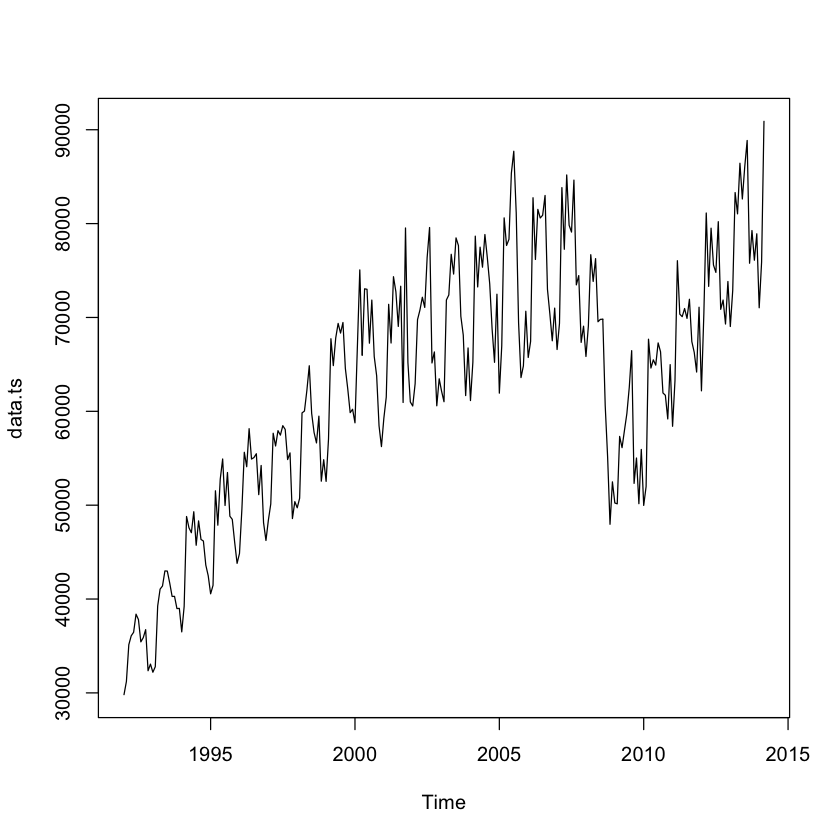

In [7]:
plot(data.ts)

In [8]:
library(strucchange)

In [15]:
time<-c(1:length(data.ts))
bp<-breakpoints(data.ts~time)
summary(bp)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = data.ts ~ time)

Breakpoints at observation number:
                         
m = 1                 200
m = 2      86         200
m = 3      86     158 200
m = 4   40 86     158 200
m = 5   40 80 120 160 200

Corresponding to breakdates:
                                                
m = 1                                    2008(8)
m = 2           1999(2)                  2008(8)
m = 3           1999(2)          2005(2) 2008(8)
m = 4   1995(4) 1999(2)          2005(2) 2008(8)
m = 5   1995(4) 1998(8) 2001(12) 2005(4) 2008(8)

Fit:
                                                               
m   0         1         2         3         4         5        
RSS 2.264e+10 1.006e+10 7.740e+09 7.409e+09 7.241e+09 7.601e+09
BIC 5.649e+03 5.449e+03 5.396e+03 5.401e+03 5.411e+03 5.441e+03

In [13]:
bp$breakpoints

[1]  86 200

In [16]:
#break points
t1=bp$breakpoints[1]
t2=bp$breakpoints[2]

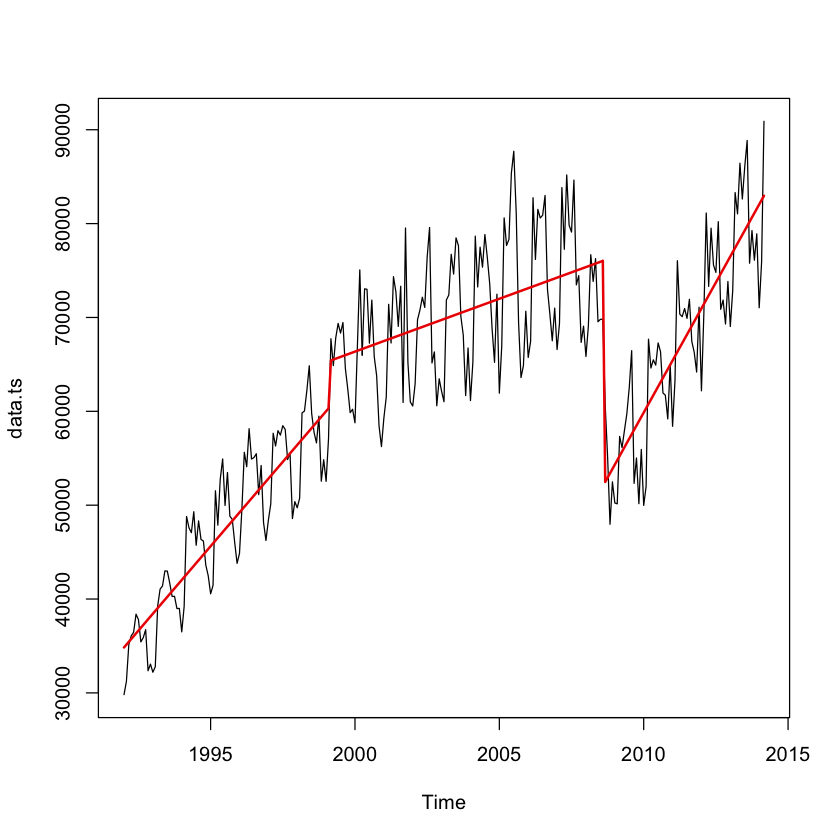

In [17]:
plot(data.ts)
points(time(data.ts),fitted(bp),col="red2",type="l",lwd=2)

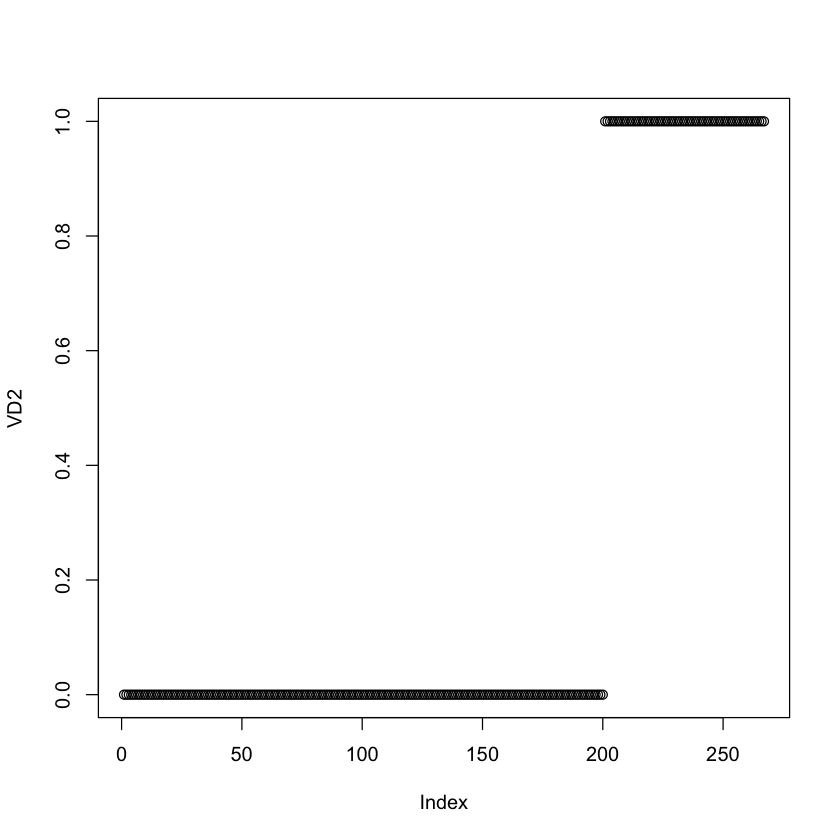

In [19]:
VD1<-ifelse(time>t1 & time<=t2,1,0)
VD2<-ifelse(time>t2,1,0)
plot(VD2)

In [20]:
Model1<-lm(data.ts~time+time*VD1+time*VD2)
#Model1<-lm(data.ts~time*(VD1+VD2)) same result
summary(Model1)


Call:
lm(formula = data.ts ~ time + time * VD1 + time * VD2)

Residuals:
     Min       1Q   Median       3Q      Max 
-11151.7  -4446.4    336.4   3887.8  15156.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34540.59    1184.79  29.153  < 2e-16 ***
time           299.65      23.66  12.667  < 2e-16 ***
VD1          22719.09    2571.14   8.836  < 2e-16 ***
VD2         -74939.35    8164.05  -9.179  < 2e-16 ***
time:VD1      -205.83      28.28  -7.278 3.98e-12 ***
time:VD2       162.40      41.75   3.890 0.000127 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5446 on 261 degrees of freedom
Multiple R-squared:  0.8375,	Adjusted R-squared:  0.8344 
F-statistic:   269 on 5 and 261 DF,  p-value: < 2.2e-16


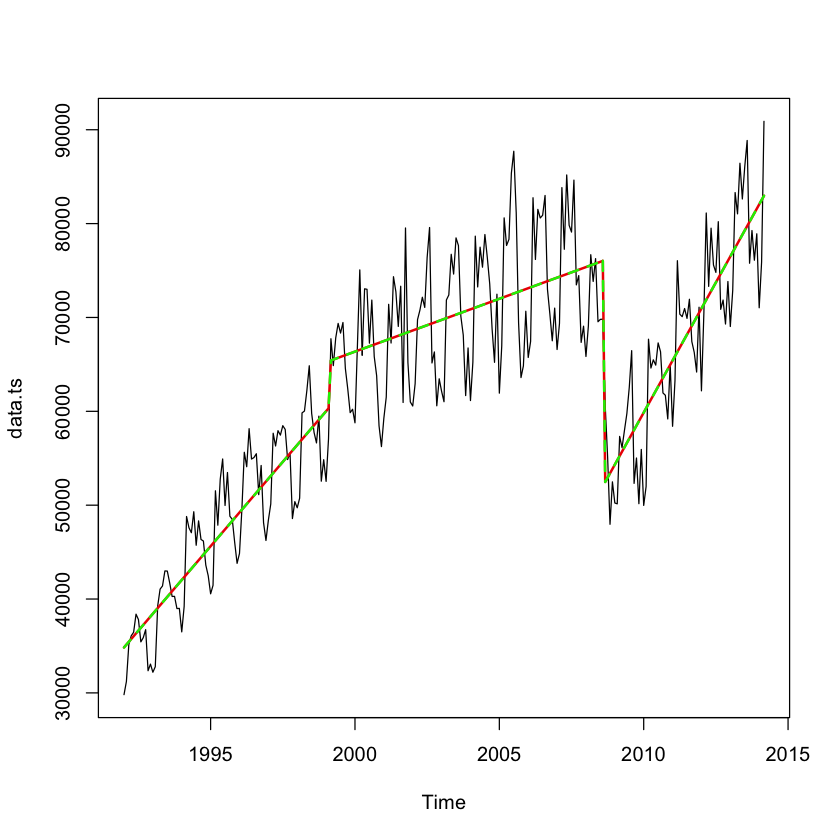

In [21]:
plot(data.ts)
points(time(data.ts),fitted(bp),col="red2",type="l",lwd=2)
points(time(data.ts),fitted(Model1),col="green2",type="l",lwd=2,lty=2)

In [23]:
library(forecast)
DM<-seasonaldummy(data.ts)
DM

Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
1,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,1,0


In [21]:
#help(seasonaldummy)

In [24]:
Model2<-lm(data.ts~time*(VD1+VD2)+DM)
summary(Model2)


Call:
lm(formula = data.ts ~ time * (VD1 + VD2) + DM)

Residuals:
     Min       1Q   Median       3Q      Max 
-10774.2  -1823.1      9.5   1576.4  12706.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30112.19     928.42  32.434  < 2e-16 ***
time           311.70      13.34  23.359  < 2e-16 ***
VD1          22732.14    1448.66  15.692  < 2e-16 ***
VD2         -73395.59    4603.10 -15.945  < 2e-16 ***
DMJan        -3335.22     914.84  -3.646 0.000324 ***
DMFeb         -569.86     914.80  -0.623 0.533898    
DMMar         9235.60     915.50  10.088  < 2e-16 ***
DMApr         5975.66     925.54   6.456 5.54e-10 ***
DMMay         8927.40     925.34   9.648  < 2e-16 ***
DMJun         8218.33     925.19   8.883  < 2e-16 ***
DMJul         7884.89     925.11   8.523 1.49e-15 ***
DMAug         8761.64     925.08   9.471  < 2e-16 ***
DMSep         2656.28     924.88   2.872 0.004428 ** 
DMOct         2784.78     924.72   3.011 0.002866 ** 
DMNov        -20

In [27]:
T=12
MC=matrix(0,length(data.ts),6)
MS=matrix(0,length(data.ts),5)
for (i in 1:(T/2)){MC[,i]=cos(2*pi*i*time/T)}
for (i in 1:5){MS[,i]=sin(2*pi*i*time/T)}

In [28]:
Model3<-lm(data.ts~time*(VD1+VD2)+MC+MS)
summary(Model3)


Call:
lm(formula = data.ts ~ time * (VD1 + VD2) + MC + MS)

Residuals:
     Min       1Q   Median       3Q      Max 
-10774.2  -1823.1      9.5   1576.4  12706.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34156.03     668.10  51.124  < 2e-16 ***
time           311.70      13.34  23.359  < 2e-16 ***
VD1          22732.14    1448.66  15.692  < 2e-16 ***
VD2         -73395.59    4603.10 -15.945  < 2e-16 ***
MC1          -5611.91     266.47 -21.060  < 2e-16 ***
MC2          -1069.64     265.52  -4.028 7.45e-05 ***
MC3            717.34     265.97   2.697  0.00747 ** 
MC4            983.71     265.50   3.705  0.00026 ***
MC5            785.40     265.95   2.953  0.00345 ** 
MC6            151.25     187.73   0.806  0.42119    
MS1            186.96     265.22   0.705  0.48153    
MS2           -423.34     265.68  -1.593  0.11233    
MS3          -1143.10     265.03  -4.313 2.32e-05 ***
MS4           -259.18     265.49  -0.976  0.32989    
MS5        

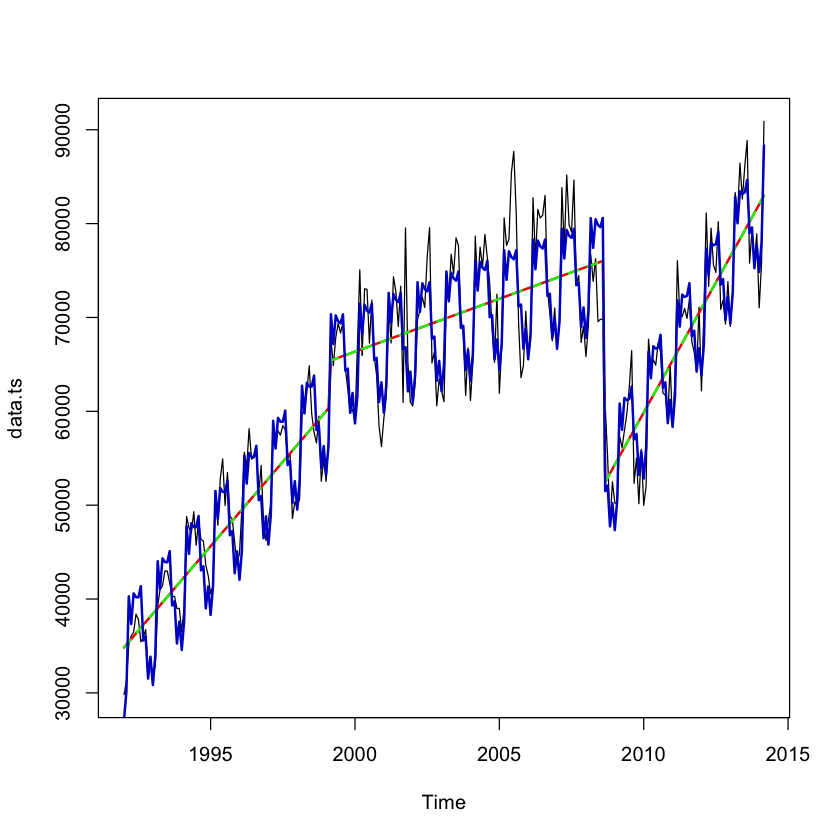

In [29]:
plot(data.ts)
points(time(data.ts),fitted(bp),col="red2",type="l",lwd=2)
points(time(data.ts),fitted(Model1),col="green2",type="l",lwd=2,lty=2)
points(time(data.ts),fitted(Model2),col="blue3",type="l",lwd=2)

In [30]:
bp2<-breakpoints(data.ts~time+I(time^2))
summary(bp2)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = data.ts ~ time + I(time^2))

Breakpoints at observation number:
                         
m = 1                 200
m = 2         128     200
m = 3      86     164 206
m = 4      70 110 164 206
m = 5   40 80 122 164 206

Corresponding to breakdates:
                                                
m = 1                                    2008(8)
m = 2                    2002(8)         2008(8)
m = 3           1999(2)          2005(8) 2009(2)
m = 4           1997(10) 2001(2) 2005(8) 2009(2)
m = 5   1995(4) 1998(8)  2002(2) 2005(8) 2009(2)

Fit:
                                                               
m   0         1         2         3         4         5        
RSS 1.600e+10 7.786e+09 7.521e+09 7.133e+09 7.003e+09 7.100e+09
BIC 5.562e+03 5.392e+03 5.405e+03 5.413e+03 5.430e+03 5.456e+03

In [31]:
bp2$breakpoints

[1] 200

In [32]:
t3=bp2$breakpoints[1]
VD3=VD2
Model4<-lm(data.ts~(time+I(time^2))*VD3)
Model5<-lm(data.ts~(time+I(time^2))*VD3+DM)
summary(Model5)


Call:
lm(formula = data.ts ~ (time + I(time^2)) * VD3 + DM)

Residuals:
    Min      1Q  Median      3Q     Max 
-8821.7 -1852.5  -177.2  1734.2 12960.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   27458.2728   893.3996  30.735  < 2e-16 ***
time            446.6152    14.6918  30.399  < 2e-16 ***
I(time^2)        -1.1775     0.0708 -16.632  < 2e-16 ***
VD3           -3835.1952 59662.0197  -0.064 0.948797    
DMJan         -3236.6853   889.2534  -3.640 0.000332 ***
DMFeb          -487.0869   889.2504  -0.548 0.584352    
DMMar          9472.0008   889.2871  10.651  < 2e-16 ***
DMApr          6236.4805   899.8487   6.931 3.55e-11 ***
DMMay          9169.1949   899.8348  10.190  < 2e-16 ***
DMJun          8442.3511   899.8337   9.382  < 2e-16 ***
DMJul          8092.4034   899.8449   8.993  < 2e-16 ***
DMAug          8953.8973   899.8691   9.950  < 2e-16 ***
DMSep          2697.1607   898.8692   3.001 0.002967 ** 
DMOct          2810.9906   898.7

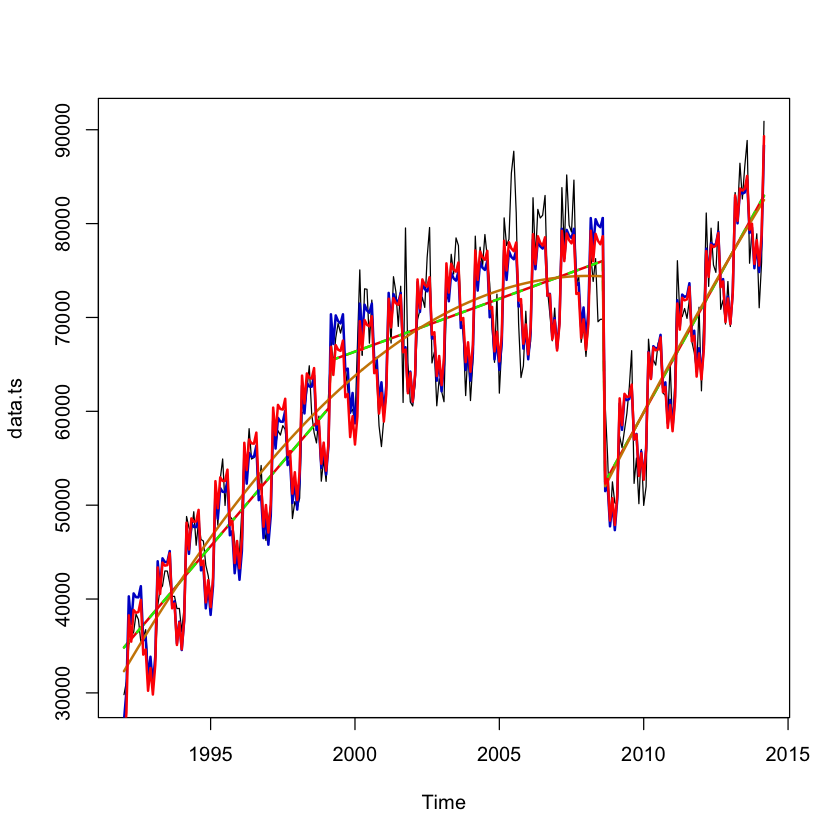

In [33]:
plot(data.ts)
points(time(data.ts),fitted(bp),col="red2",type="l",lwd=2)
points(time(data.ts),fitted(Model1),col="green2",type="l",lwd=2,lty=2)
points(time(data.ts),fitted(Model2),col="blue3",type="l",lwd=2)
points(time(data.ts),fitted(Model4),col="orange3",type="l",lwd=2)
points(time(data.ts),fitted(Model5),col="red",type="l",lwd=2)

In [84]:
# try to check breakpoints before using any particular model
bp2$breakpoints

[1] 200

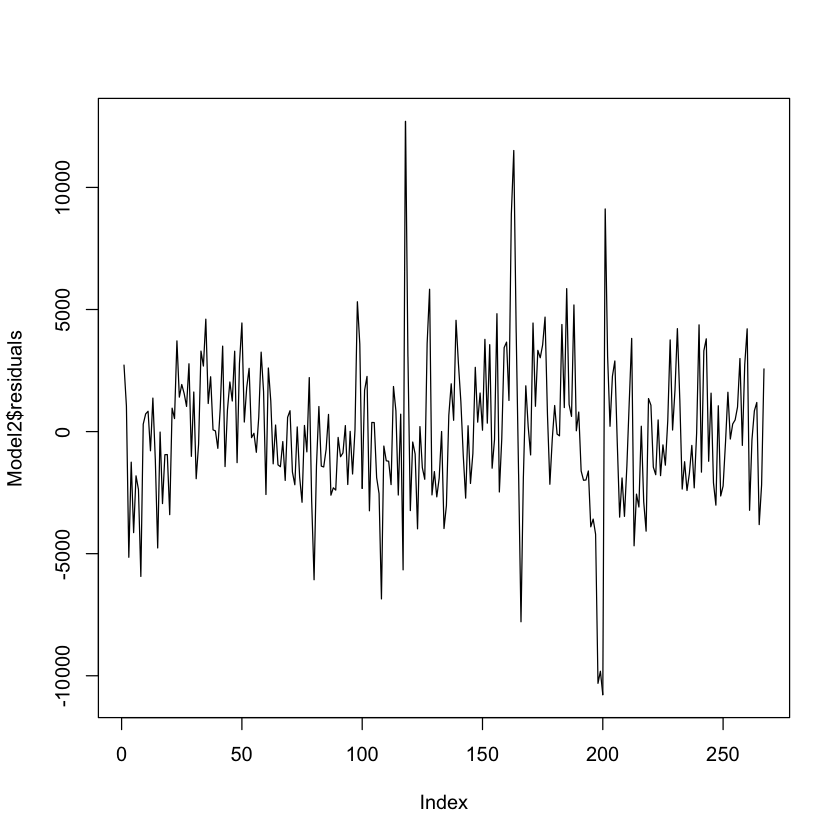

In [86]:
# Let's take model 2 as best model
plot(Model2$residuals,type="l")

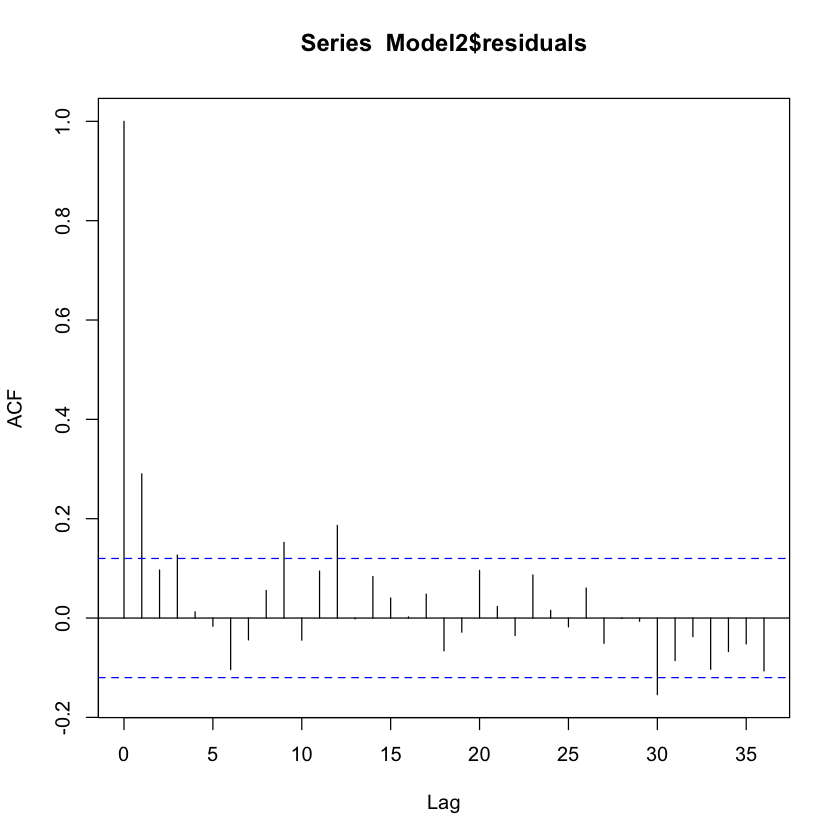

In [87]:
acf(Model2$residuals,lag=36)

In [39]:
library(tseries)
Box.test(Model2$residuals)


	Box-Pierce test

data:  Model2$residuals
X-squared = 22.502, df = 1, p-value = 2.1e-06



	Box-Pierce test

data:  R
X-squared = 0.43127, df = 1, p-value = 0.5114


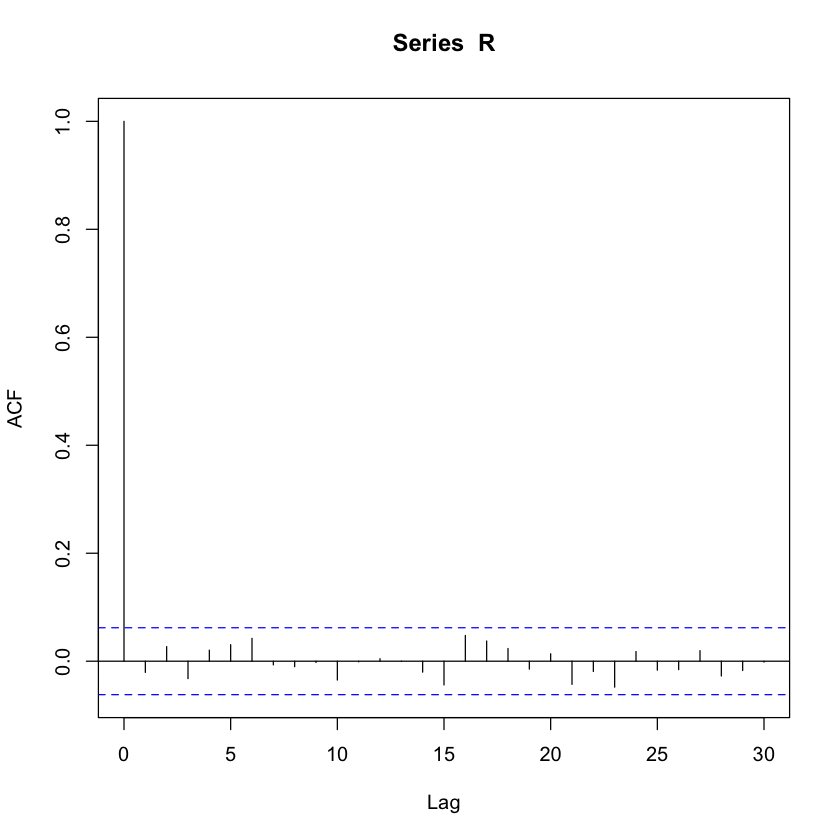

In [34]:
R=rnorm(1000)
acf(R)
Box.test(R)